First Idea is to get washington data from a few sources and aggregate or average it to compare. Also need to practice pandas for different sources (CSV, API etc..)


Blue Command


Green Edit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt
import requests
import json
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta



%matplotlib inline

In [2]:


nyt = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',parse_dates= ['date'],index_col='date') #index_col='date'
nyt = pd.DataFrame(nyt[nyt['state'].isin(['Washington'])]).sort_values(by= 'date', ascending=False)
nyt['cases_day'] = abs(nyt.cases.diff(periods=-1))
nyt['case_curve'] = nyt.cases_day.rolling(window=14).mean()


nyt['deaths_day'] = abs(nyt.deaths.diff(periods=-1))
nyt['death_curve'] = nyt.deaths_day.rolling(window=14).mean()


#Day Zero https://www.nytimes.com/2020/03/11/business/media/tom-hanks-coronavirus.html
nyt = nyt.loc[nyt.index>='3/11/2020']


nyt.dtypes
# nyt.head()
#nyt.head()

state           object
fips             int64
cases            int64
deaths           int64
cases_day      float64
case_curve     float64
deaths_day     float64
death_curve    float64
dtype: object

In [3]:
nyt.head(50)

,state,fips,cases,deaths,cases_day,case_curve,deaths_day,death_curve
date,,,,,,,,
2020-08-30,Washington,53,77123,1993,288.0,NaN,0.0,NaN
2020-08-29,Washington,53,76835,1993,437.0,NaN,0.0,NaN
2020-08-28,Washington,53,76398,1993,645.0,NaN,15.0,NaN
2020-08-27,Washington,53,75753,1978,545.0,NaN,9.0,NaN
2020-08-26,Washington,53,75208,1969,573.0,NaN,6.0,NaN
2020-08-25,Washington,53,74635,1963,342.0,NaN,9.0,NaN
2020-08-24,Washington,53,74293,1954,547.0,NaN,5.0,NaN
2020-08-23,Washington,53,73746,1949,392.0,NaN,4.0,NaN
2020-08-22,Washington,53,73354,1945,566.0,NaN,7.0,NaN


In [4]:
nyt.to_csv("C:/Users/User/Documents/My Tableau Repository/Datasources/NYT_Washington.csv")

Text(0.0, 1.0, 'Washington Distributions')

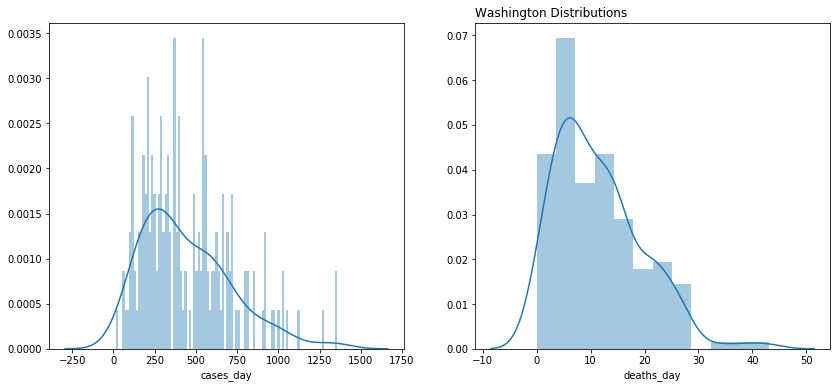

In [5]:
#hist of cases and deaths
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = [14,6])
    
    sns.distplot(nyt['cases_day'],ax=ax1,bins=100)
    sns.distplot(nyt['deaths_day'], ax=ax2)

plt.title('Washington Distributions',loc='left')

Text(0.0, 1.0, 'Washington Distributions')

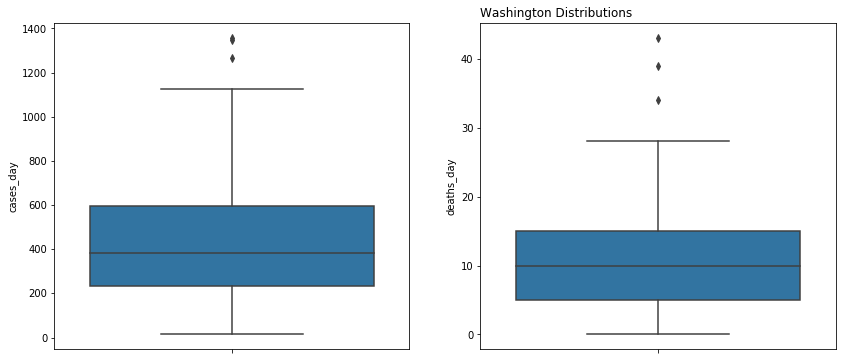

In [6]:
#hist of cases and deaths
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = [14,6])
    
    sns.boxplot(y='cases_day',data=nyt,ax=ax1)
    sns.boxplot(y='deaths_day',data=nyt,ax=ax2)

plt.title('Washington Distributions',loc='left')

''

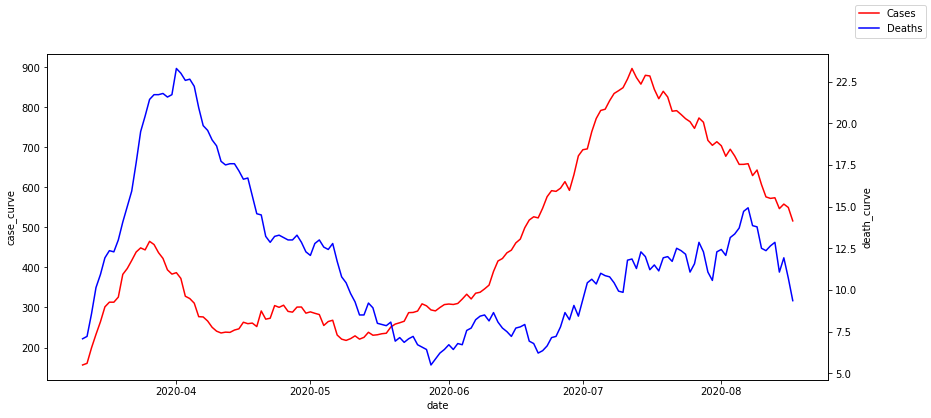

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[14,6])

sns.lineplot(x=nyt.index, y='case_curve',data=nyt,ax=ax,color='red')

ax2= ax.twinx()
sns.lineplot(x=nyt.index, y='death_curve',data=nyt,
              ax=ax2,color = 'b')

ax.figure.legend(labels= ('Cases','Deaths'))
;

In [8]:
wa_case_matrix = pd.pivot_table(nyt,
                               index=nyt.index.day,
                               columns = nyt.index.month,
                               values = 'cases_day')
wa_case_matrix.sort_index(level = 0, ascending = False, inplace=True)

# wa_case_matrix.head()

''

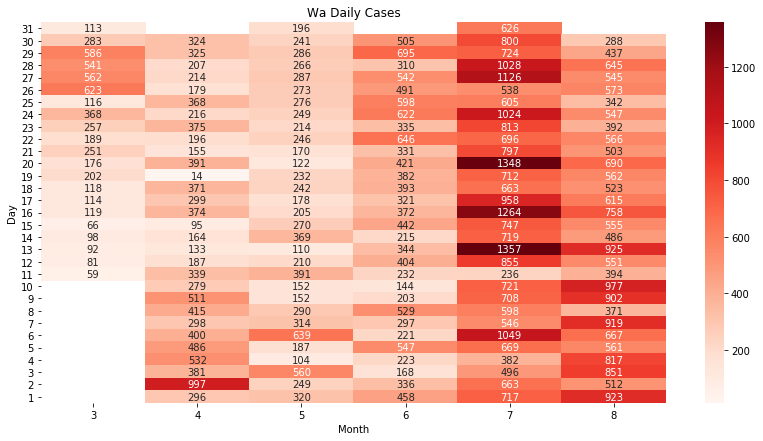

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14, 7])

sns.heatmap(wa_case_matrix,
           annot=True,
           cmap ='Reds',
           fmt='g')
ax.set_xlabel('Month')
ax.set_ylabel('Day')
plt.title('Wa Daily Cases')
;

In [10]:
ctp = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv',parse_dates=['date'])
ctp = ctp[['date','state','positive','negative','death']]


ctp = pd.pivot_table(ctp,
                  index='date',
                  columns='state',
                  values = 'positive')
ctp.sort_index(level=0,ascending=False,inplace=True)
d=datetime.today() - relativedelta(days=30)
ctp = ctp.loc[ctp.index>=d]

ctp = ctp.diff().abs()
ctp.head()


state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,
2020-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-29,51.0,1346.0,478.0,0.0,374.0,6070.0,268.0,0.0,34.0,6.0,...,835.0,3824.0,448.0,938.0,11.0,11.0,1019.0,570.0,143.0,36.0
2020-08-28,112.0,1704.0,795.0,0.0,629.0,4981.0,430.0,0.0,74.0,266.0,...,1465.0,4762.0,458.0,1217.0,43.0,16.0,598.0,862.0,143.0,21.0
2020-08-27,122.0,1162.0,838.0,0.0,519.0,5329.0,350.0,145.0,57.0,107.0,...,1636.0,4031.0,391.0,2134.0,23.0,3.0,542.0,864.0,191.0,41.0
2020-08-26,82.0,1769.0,722.0,0.0,680.0,4430.0,193.0,130.0,72.0,10.0,...,1826.0,5600.0,383.0,0.0,22.0,9.0,456.0,912.0,93.0,38.0


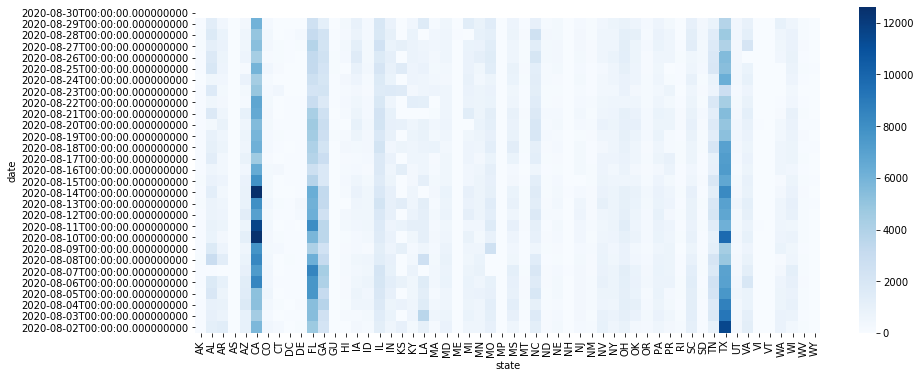

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[14,6])
sns.heatmap(ctp,
            ax=ax,
            cmap = 'Blues'


)

In [12]:
d=(datetime.today() - relativedelta(days=1)).date()
rank = pd.DataFrame(ctp.loc[d]).sort_values(by=d ,ascending=False)
rank.columns=['Today']



rank.head()

,Today
state,
AK,NaN
AL,NaN
AR,NaN
AS,NaN
AZ,NaN


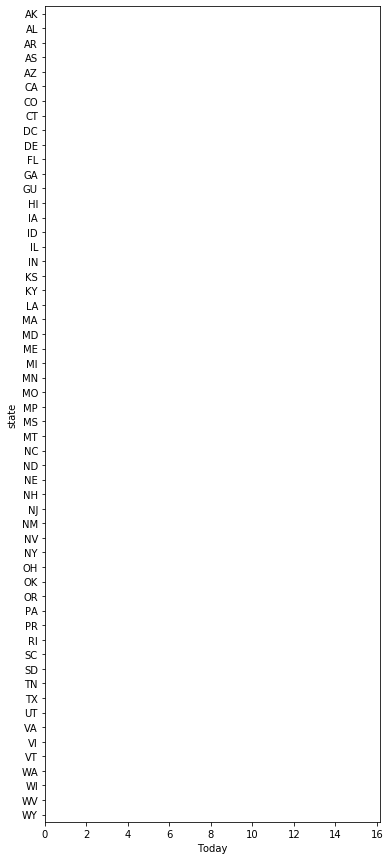

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=[6,15])
sns.barplot(y=rank.index
            ,x='Today'
            ,data=rank
           ,ax=ax
           ,color='b')

In [14]:
rank.describe()

,Today
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN
